In [ ]:
!gdown --id '1BZb2AqOHHaad7Mo82St1qTBaXo_xtcUc' --output trainX.npy 
!gdown --id '152NKCpj8S_zuIx3bQy0NN5oqpvBjdPIq' --output valX.npy 
!gdown --id '1_hRGsFtm5KEazUg2ZvPZcuNScGF-ANh4' --output valY.npy 
!mkdir checkpoints
!ls

Downloading...
From: https://drive.google.com/uc?id=1BZb2AqOHHaad7Mo82St1qTBaXo_xtcUc
To: /content/trainX.npy
26.1MB [00:00, 46.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=152NKCpj8S_zuIx3bQy0NN5oqpvBjdPIq
To: /content/valX.npy
100% 1.54M/1.54M [00:00<00:00, 49.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_hRGsFtm5KEazUg2ZvPZcuNScGF-ANh4
To: /content/valY.npy
100% 4.13k/4.13k [00:00<00:00, 5.95MB/s]
checkpoints  sample_data  trainX.npy  valX.npy	valY.npy


In [ ]:
import torch
from sklearn.datasets import fetch_openml
import torch.nn as nn
import numpy as np
import torch.optim as optim
import torch.utils.data as dset
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import os
import numpy as np
import cv2
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import pandas as pd
from torch.utils.data import DataLoader, Dataset
import time
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from torch.utils.data import DataLoader

trainX = np.load('trainX.npy')

def image_list(image_set):
    imagelist = np.array(image_set)
    imagelist = np.transpose(imagelist, (0, 3, 1, 2))
    imagelist = (imagelist / 255.)
    imagelist = imagelist.astype(np.float32)
    return imagelist

data = image_list(trainX)
print(data.shape)


(8500, 3, 32, 32)


In [ ]:
import torch.nn as nn
import torch
class auto_encoder(nn.Module):
    def __init__(self):
        super(auto_encoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 30, 3, stride=1, padding=1),  # [10, 32, 32]
            nn.ReLU(True), 
            nn.MaxPool2d((2, 2)),  
            nn.Conv2d(30, 50, 3, stride=1, padding=1), # [30, 16, 16]
            nn.ReLU(True), 
            nn.MaxPool2d((2, 2)),     
            nn.Conv2d(50, 100, 3, stride=1, padding=1), # [40, 8, 8]
            nn.ReLU(True),
            nn.MaxPool2d((2, 2)), 
            nn.Conv2d(100, 150, 3, stride=1, padding=1), # [50, 4, 4]
            nn.ReLU(True),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(150, 100, 10, stride=1, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(100, 50, 9,stride=1, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(50, 30, 9,stride=1, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(30, 3, 12,stride=1, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        out = self.encoder(x)
        out_2 = self.decoder(out)
        return out, out_2


In [ ]:
from torch.distributions import normal

AE = auto_encoder().cuda()
loss = nn.MSELoss()
optimizer = torch.optim.Adam(AE.parameters(), lr = 1e-5)
AE.train()

num_epoch = 550

img_dataloader = DataLoader(data, batch_size=300, shuffle=True)

for epoch in range(num_epoch):
    epoch_starttime = time.time()
    train_acc = 0.0
    epoch_loss = 0
    for data_ in img_dataloader:

        train_img = data_
        train_img = train_img.cuda()

        

        out1, out = AE(train_img)


        loss_ = loss(out, train_img)
        optimizer.zero_grad()
        loss_.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        torch.save(AE.state_dict(), './checkpoints/checkpoint_{}.pth'.format(epoch+1))
    epoch_loss += loss_

    print('epoch [{}/{}], loss:{:.5f}'.format(epoch+1, num_epoch, epoch_loss))
    
torch.save(AE.state_dict(), './checkpoints/last_checkpoint.pth')


        



epoch [1/550], loss:0.28601
epoch [2/550], loss:0.22313
epoch [3/550], loss:0.16952
epoch [4/550], loss:0.12034
epoch [5/550], loss:0.10956
epoch [6/550], loss:0.08143
epoch [7/550], loss:0.07328
epoch [8/550], loss:0.06147
epoch [9/550], loss:0.05944
epoch [10/550], loss:0.05859
epoch [11/550], loss:0.05884
epoch [12/550], loss:0.05134
epoch [13/550], loss:0.04789
epoch [14/550], loss:0.04980
epoch [15/550], loss:0.05150
epoch [16/550], loss:0.04536
epoch [17/550], loss:0.04664
epoch [18/550], loss:0.04941
epoch [19/550], loss:0.04397
epoch [20/550], loss:0.04838
epoch [21/550], loss:0.04429
epoch [22/550], loss:0.04289
epoch [23/550], loss:0.04389
epoch [24/550], loss:0.04086
epoch [25/550], loss:0.03999
epoch [26/550], loss:0.03608
epoch [27/550], loss:0.03879
epoch [28/550], loss:0.03425
epoch [29/550], loss:0.03690
epoch [30/550], loss:0.03538
epoch [31/550], loss:0.03892
epoch [32/550], loss:0.03107
epoch [33/550], loss:0.03596
epoch [34/550], loss:0.03604
epoch [35/550], loss:0.

In [ ]:
for epoch in range(num_epoch):
    epoch_starttime = time.time()
    train_acc = 0.0
    epoch_loss = 0
    for data_ in img_dataloader:

        train_img = data_
        train_img = train_img.cuda()

        

        out1, out = AE(train_img)


        loss_ = loss(out, train_img)
        optimizer.zero_grad()
        loss_.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        torch.save(AE.state_dict(), './checkpoints/checkpoint_{}.pth'.format(epoch+1))
    epoch_loss += loss_

    print('epoch [{}/{}], loss:{:.5f}'.format(epoch+1, num_epoch, epoch_loss))

NameError: ignored

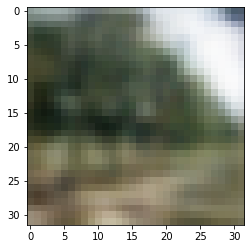

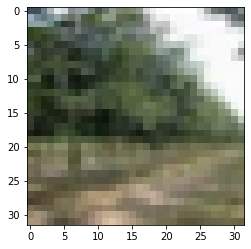

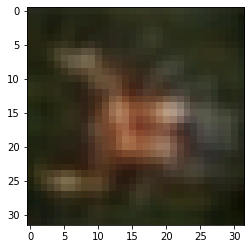

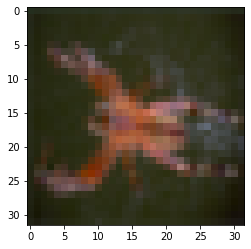

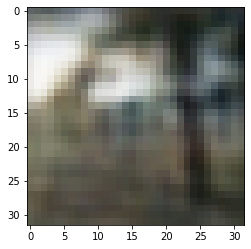

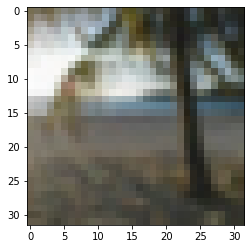

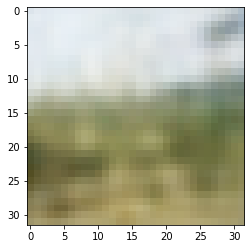

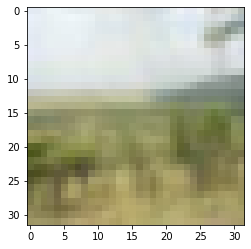

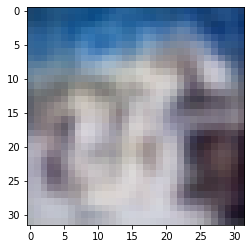

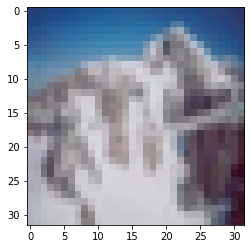

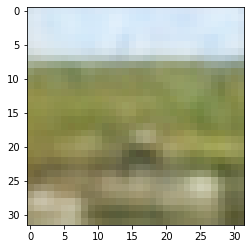

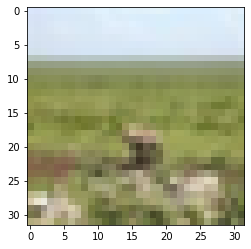

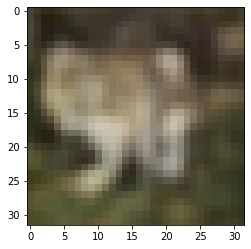

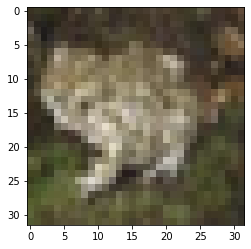

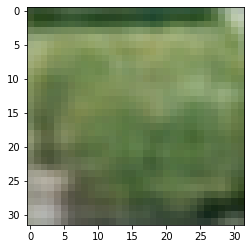

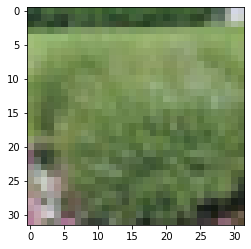

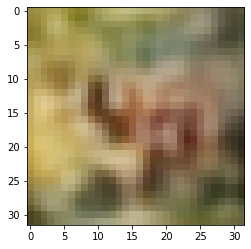

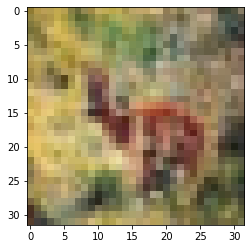

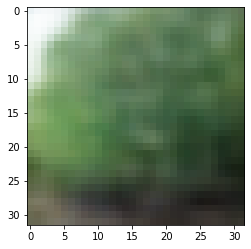

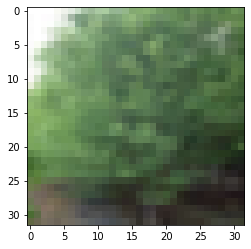

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

valX = np.load('valX.npy')
validation_X = image_list(valX)


def inference(model, data):
    inference_data = []
    img_tmp = []
    dataloader = DataLoader(data, batch_size=1, shuffle=False)
    for x in dataloader:
        x = torch.FloatTensor(x)
        with torch.no_grad():
            vec, img = model(x.cuda())
            np_img = img.cpu().numpy()
            np_img = np.squeeze(np.array(np_img), 0)
            np_img = np.transpose(np_img, (1, 2, 0))
            np_img = np.clip(np_img, 0, 1)
            img_tmp.append(np_img)
            inference_data.append(vec.view(2400).cpu().numpy())
    return np.array(inference_data), img_tmp

def dimension_reduction(data):
    pca=KernelPCA(n_components=1000)
    pca_x = pca.fit_transform(data)
    X_embedded = TSNE(n_components=2).fit_transform(pca_x)
    return X_embedded

def print_image(idx, original, inference):
    Image = np.clip(inference[idx], 0, 1)
    plt.figure()
    plt.imshow(Image)
    plt.figure()
    plt.imshow(np.transpose(original[idx], (1, 2, 0)))

img_predict, img_result = inference(AE, validation_X)


data_list = dimension_reduction(img_predict)


for i in range(20, 30):
    print_image(i, validation_X, img_result)




acc =  0.8160000000000001


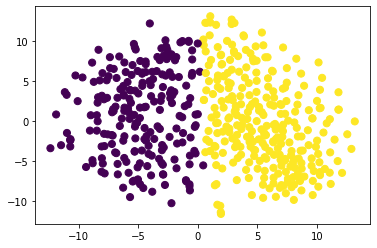

In [ ]:
labels =  kmeans.predict(data_list)
centroids = kmeans.cluster_centers_
plt.scatter(data_list[:, 0], data_list[:, 1], c=labels,
            s=50, cmap='viridis');

correct = 0

valY = np.load('valY.npy')

for i in range(labels.shape[0]):
    if labels[i] == valY[i]:
        correct += 1

if  correct/labels.shape[0] > 1 - correct/labels.shape[0]:
    print("acc = ", correct/labels.shape[0])
else:
    print("acc = ", 1 - correct/labels.shape[0])




